# IMPORT LIBRARY

In [492]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# VISUALIZE DATA

In [493]:
df = pd.read_csv('data/train.csv')
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [494]:
df_y = df.iloc[:, -1]
print(df_y)


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [495]:
y = np.array(df_y)
print(y.shape)
print(y)

(1460,)
[208500 181500 223500 ... 266500 142125 147500]


In [496]:
df = df.drop(columns=["Id"])
df = df.drop(columns=["SalePrice"])

In [497]:
print(df.columns.tolist())

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

In [498]:
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].unique().tolist()

# In ra kết quả
for col, values in unique_values.items():
    print(f"{col}' có {len(values)} giá trị duy nhất: {values}")

MSSubClass' có 15 giá trị duy nhất: [60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80, 160, 75, 180, 40]
MSZoning' có 5 giá trị duy nhất: ['RL', 'RM', 'C (all)', 'FV', 'RH']
LotFrontage' có 111 giá trị duy nhất: [65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan, 51.0, 50.0, 70.0, 91.0, 72.0, 66.0, 101.0, 57.0, 44.0, 110.0, 98.0, 47.0, 108.0, 112.0, 74.0, 115.0, 61.0, 48.0, 33.0, 52.0, 100.0, 24.0, 89.0, 63.0, 76.0, 81.0, 95.0, 69.0, 21.0, 32.0, 78.0, 121.0, 122.0, 40.0, 105.0, 73.0, 77.0, 64.0, 94.0, 34.0, 90.0, 55.0, 88.0, 82.0, 71.0, 120.0, 107.0, 92.0, 134.0, 62.0, 86.0, 141.0, 97.0, 54.0, 41.0, 79.0, 174.0, 99.0, 67.0, 83.0, 43.0, 103.0, 93.0, 30.0, 129.0, 140.0, 35.0, 37.0, 118.0, 87.0, 116.0, 150.0, 111.0, 49.0, 96.0, 59.0, 36.0, 56.0, 102.0, 58.0, 38.0, 109.0, 130.0, 53.0, 137.0, 45.0, 106.0, 104.0, 42.0, 39.0, 144.0, 114.0, 128.0, 149.0, 313.0, 168.0, 182.0, 138.0, 160.0, 152.0, 124.0, 153.0, 46.0]
LotArea' có 1073 giá trị duy nhất: [8450, 9600, 11250, 9550, 14260, 14115, 10084, 10382

In [499]:
# Giả sử df là DataFrame của bạn
null_counts = df.isnull().sum()
cols_with_null_names = df.columns[df.isnull().any()].tolist()
# Lọc ra các cột có giá trị null
cols_with_null = null_counts[null_counts > 0]

# In kết quả
print("Các cột có giá trị null:")
print(cols_with_null)
print(cols_with_null_names)

Các cột có giá trị null:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [500]:
mean_value = df['LotFrontage'].mean()
print(f"Mean LotFrontage: {mean_value}")
df['LotFrontage'].fillna(mean_value, inplace=True)
print(df['LotFrontage'].isnull().sum()) 

max_value = df['LotFrontage'].max()
print(f"Max LotFrontage: {max_value}")
df['LotFrontage'] = df['LotFrontage'] / max_value

print(df['LotFrontage'])

Mean LotFrontage: 70.04995836802665
0
Max LotFrontage: 313.0
0       0.207668
1       0.255591
2       0.217252
3       0.191693
4       0.268371
          ...   
1455    0.198083
1456    0.271565
1457    0.210863
1458    0.217252
1459    0.239617
Name: LotFrontage, Length: 1460, dtype: float64


/tmp/ipykernel_287017/1634941324.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(mean_value, inplace=True)


In [501]:
print(df['Alley'].unique())

[nan 'Grvl' 'Pave']


In [502]:
le = LabelEncoder()
df['Alley'] = le.fit_transform(df['Alley'].fillna('None'))  
max_df_alley_value = df['Alley'].max()
print(max_df_alley_value)
df['Alley'] = df['Alley'] / max_df_alley_value

print(df['Alley'].isnull().sum()) 
print(df['Alley'].unique())


2
0
[0.5 0.  1. ]


In [503]:
print(df['MasVnrType'].unique())

['BrkFace' nan 'Stone' 'BrkCmn']


In [504]:
masvnrtype_map = {
    None: 0,
    "BrkCmn": 1,
    "BrkFace": 2,
    "CBlock": 3,
    "Stone": 4
}

In [505]:
df['MasVnrType'] = le.fit_transform(df['MasVnrType'].fillna('None'))  
print(df['MasVnrType'].unique())
max_value = len(masvnrtype_map) - 1
df['MasVnrType'] = df['MasVnrType'] / max_value

print(f"Null amount: {df['MasVnrType'].isnull().sum()}") 
print(df['MasVnrType'].unique())

[1 2 3 0]
Null amount: 0
[0.25 0.5  0.75 0.  ]


In [506]:
print(df['MasVnrArea'].unique())

[1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.830e+02 4.800e+01 2.800e+01
 3.360e+02 6.000e+02 7.680e+02 4.800e+02 2.200e+02 1.840e+02 1.129e+03
 1.160e+02 1.350e+02 2.660e+02 8.500e+01 3.090e+02 1.360e+02 2.880e+02
 7.000e+01 3.200e+02 5.000e+01 1.200e+02 4.360e+02 2.520e+02 8.400e+01
 6.640e+02 2.260e+02 3.000e+02 6.530e+02 1.120e+02 4.910e+02 2.680e+02
 7.480e+02 9.800e+01 2.750e+02 1.380e+02 2.050e+02 2.620e+02 1.280e+02
 2.600e+02 1.530e+02 6.400e+01 3.120e+02 1.600e+01 9.220e+02 1.420e+02
 2.900e+02 1.270e+02 5.060e+02 2.970e+02       nan 6.040e+02 2.540e+02
 3.600e+01 1.020e+02 4.720e+02 4.810e+02 1.080e+02 3.020e+02 1.720e+02
 3.990

In [507]:
mean_value = df['MasVnrArea'].mean()
print(f"Mean MasVnrArea: {mean_value}")
df['MasVnrArea'].fillna(mean_value, inplace=True)
print(df['MasVnrArea'].isnull().sum()) 

max_value = df['MasVnrArea'].max()
print(f"Max MasVnrArea: {max_value}")
df['MasVnrArea'] = df['MasVnrArea'] / max_value

print(df['MasVnrArea'].unique())

Mean MasVnrArea: 103.68526170798899
0
Max MasVnrArea: 1600.0
[1.22500000e-01 0.00000000e+00 1.01250000e-01 2.18750000e-01
 1.16250000e-01 1.50000000e-01 1.78750000e-01 1.91250000e-01
 1.32500000e-01 1.12500000e-01 2.37500000e-01 1.75625000e-01
 4.00000000e-01 1.25000000e-01 1.53750000e-01 8.25000000e-02
 4.06250000e-01 6.31250000e-02 2.57500000e-01 1.70000000e-01
 2.85000000e-01 6.44375000e-01 1.11250000e-01 3.58125000e-01
 2.15000000e-01 1.79375000e-01 1.04375000e-01 6.96875000e-01
 2.50000000e-02 6.50000000e-02 3.60000000e-01 2.76875000e-01
 2.92500000e-01 4.12500000e-02 1.37500000e-02 1.77500000e-01
 4.75000000e-02 1.26875000e-01 4.25000000e-02 1.14375000e-01
 3.00000000e-02 1.75000000e-02 2.10000000e-01 3.75000000e-01
 4.80000000e-01 3.00000000e-01 1.37500000e-01 1.15000000e-01
 7.05625000e-01 7.25000000e-02 8.43750000e-02 1.66250000e-01
 5.31250000e-02 1.93125000e-01 8.50000000e-02 1.80000000e-01
 4.37500000e-02 2.00000000e-01 3.12500000e-02 7.50000000e-02
 2.72500000e-01 1.575000

/tmp/ipykernel_287017/3304671886.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MasVnrArea'].fillna(mean_value, inplace=True)


In [508]:
print(df['BsmtQual'].unique())

['Gd' 'TA' 'Ex' nan 'Fa']


In [509]:
bsmtqual_map = {
    None: 0,
    "Ex": 1,	
    "Gd": 2,
    "TA": 3,	
    "Fa": 4,	
    "Po": 5
}

In [510]:
df['BsmtQual'] = le.fit_transform(df['BsmtQual'].fillna('None'))  
print(df['BsmtQual'].unique())
max_value = len(bsmtqual_map) -1 
df['BsmtQual'] = df['BsmtQual'] / max_value

print(f"Null amount: {df['BsmtQual'].isnull().sum()}") 
print(df['BsmtQual'].unique())

[2 4 0 3 1]
Null amount: 0
[0.4 0.8 0.  0.6 0.2]


In [511]:
print(df['BsmtCond'].unique())

['TA' 'Gd' nan 'Fa' 'Po']


In [512]:
bsmtcond_map = {
    None: 0,
    "Ex": 1,	
    "Gd": 2,
    "TA": 3,	
    "Fa": 4,	
    "Po": 5
}

In [513]:
df['BsmtCond'] = le.fit_transform(df['BsmtCond'].fillna('None'))  
print(df['BsmtCond'].unique())
max_value = len(bsmtcond_map)
df['BsmtCond'] = df['BsmtCond'] / max_value

print(f"Null amount: {df['BsmtCond'].isnull().sum()}") 
print(df['BsmtCond'].unique())

[4 1 2 0 3]
Null amount: 0
[0.66666667 0.16666667 0.33333333 0.         0.5       ]


In [514]:
print(df['BsmtExposure'].unique())

['No' 'Gd' 'Mn' 'Av' nan]


In [515]:
le = LabelEncoder()
df['BsmtExposure'] = le.fit_transform(df['BsmtExposure'].fillna('None'))  
max_df_alley_value = df['BsmtExposure'].max()
df['BsmtExposure'] = df['BsmtExposure'] / max_df_alley_value

print(df['BsmtExposure'].isnull().sum()) 
print(df['BsmtExposure'].unique())


0
[0.75 0.25 0.5  0.   1.  ]


In [516]:
print(df['BsmtFinType1'].unique())

['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']


In [517]:
le = LabelEncoder()
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')  # thay thế NaN
df['BsmtFinType1'] = le.fit_transform(df['BsmtFinType1'])  # mã hóa
print("Unique encoded values:", df['BsmtFinType1'].unique())

max_val = df['BsmtFinType1'].max()
df['BsmtFinType1'] = df['BsmtFinType1'] / max_val

print("Missing:", df['BsmtFinType1'].isnull().sum())
print("Unique encoded values:", df['BsmtFinType1'].unique())


Unique encoded values: [2 0 6 5 1 4 3]
Missing: 0
Unique encoded values: [0.33333333 0.         1.         0.83333333 0.16666667 0.66666667
 0.5       ]


In [518]:
print(df['BsmtFinType2'].unique())

['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


In [519]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')  # thay thế NaN
df['BsmtFinType2'] = le.fit_transform(df['BsmtFinType2'])  # mã hóa
print("Unique encoded values:", df['BsmtFinType2'].unique())

max_val = df['BsmtFinType2'].max()
df['BsmtFinType2'] = df['BsmtFinType2'] / max_val

print("Missing:", df['BsmtFinType2'].isnull().sum())
print("Unique encoded values:", df['BsmtFinType2'].unique())

Unique encoded values: [6 1 4 0 5 3 2]
Missing: 0
Unique encoded values: [1.         0.16666667 0.66666667 0.         0.83333333 0.5
 0.33333333]


In [520]:
print(df['Electrical'].unique())

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


In [521]:
df['Electrical'].value_counts(dropna=False)

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: count, dtype: int64

In [522]:
df['Electrical'] = df['Electrical'].fillna("SBrkr")
df['Electrical'].value_counts(dropna=False)


Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [523]:
df['Electrical'] = le.fit_transform(df['Electrical'])  # mã hóa
print("Unique encoded values:", df['Electrical'].unique())

max_val = df['Electrical'].max()
df['Electrical'] = df['Electrical'] / max_val

print("Missing:", df['Electrical'].isnull().sum())
print("Unique encoded values:", df['Electrical'].unique())

Unique encoded values: [4 1 0 2 3]
Missing: 0
Unique encoded values: [1.   0.25 0.   0.5  0.75]


In [524]:
print(df['FireplaceQu'].unique())

[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


In [525]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')  # thay thế NaN
df['FireplaceQu'] = le.fit_transform(df['FireplaceQu'])  # mã hóa
print("Unique encoded values:", df['FireplaceQu'].unique())

max_val = df['FireplaceQu'].max()
df['FireplaceQu'] = df['FireplaceQu'] / max_val

print("Missing:", df['FireplaceQu'].isnull().sum())
print("Unique encoded values:", df['FireplaceQu'].unique())

Unique encoded values: [3 5 2 1 0 4]
Missing: 0
Unique encoded values: [0.6 1.  0.4 0.2 0.  0.8]


In [526]:
print(df['GarageType'].unique())

['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']


In [527]:
df['GarageType'] = df['GarageType'].fillna('None')  # thay thế NaN
df['GarageType'] = le.fit_transform(df['GarageType'])  # mã hóa
print("Unique encoded values:", df['GarageType'].unique())

max_val = df['GarageType'].max()
df['GarageType'] = df['GarageType'] / max_val

print("Missing:", df['GarageType'].isnull().sum())
print("Unique encoded values:", df['GarageType'].unique())

Unique encoded values: [1 5 3 4 6 2 0]
Missing: 0
Unique encoded values: [0.16666667 0.83333333 0.5        0.66666667 1.         0.33333333
 0.        ]


In [528]:
print(df['GarageYrBlt'].unique())

[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]


In [529]:
mean_value = df['GarageYrBlt'].mean()
print(f"Mean GarageYrBlt: {mean_value}")
df['GarageYrBlt'].fillna(mean_value, inplace=True)
print(df['GarageYrBlt'].isnull().sum()) 

max_value = df['GarageYrBlt'].max()
print(f"Max GarageYrBlt: {max_value}")
df['GarageYrBlt'] = df['GarageYrBlt'] / max_value

print(df['GarageYrBlt'].unique())

Mean GarageYrBlt: 1978.5061638868744
0
Max GarageYrBlt: 2010.0
[0.99651741 0.98308458 0.99552239 0.99402985 0.99502488 0.99154229
 0.99701493 0.98159204 0.96069652 0.96467662 0.97761194 0.99751244
 0.9761194  0.99800995 0.97512438 0.99054726 0.9800995  0.97860697
 0.97412935 0.960199   0.9960199  0.97910448 0.99850746 0.99900498
 0.97363184 0.95522388 0.97810945 0.97462687 0.99253731 0.9721393
 0.97164179 0.98433142 0.98656716 0.98358209 0.99353234 0.98756219
 0.97661692 0.98557214 0.97711443 0.99452736 0.96268657 0.99004975
 0.96766169 0.98855721 0.98955224 0.95273632 0.97313433 0.96915423
 0.98208955 0.99950249 0.97014925 0.97562189 0.95572139 0.94527363
 0.98457711 0.97064677 0.97960199 0.96318408 0.98258706 0.98059701
 0.95671642 0.98706468 0.95820896 0.97263682 0.9880597  0.98905473
 0.95323383 0.96119403 0.98109453 0.95422886 0.98507463 0.95721393
 0.99303483 0.96517413 0.96965174 0.9920398  0.95024876 0.9840796
 0.98606965 0.99104478 0.95771144 0.96567164 1.         0.95870647
 

/tmp/ipykernel_287017/458659829.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageYrBlt'].fillna(mean_value, inplace=True)


In [530]:
print(df['GarageFinish'].unique())

['RFn' 'Unf' 'Fin' nan]


In [531]:
df['GarageFinish'] = df['GarageFinish'].fillna('None')  # thay thế NaN
df['GarageFinish'] = le.fit_transform(df['GarageFinish'])  # mã hóa
print("Unique encoded values:", df['GarageFinish'].unique())

max_val = df['GarageFinish'].max()
df['GarageFinish'] = df['GarageFinish'] / max_val

print("Missing:", df['GarageFinish'].isnull().sum())
print("Unique encoded values:", df['GarageFinish'].unique())

Unique encoded values: [2 3 0 1]
Missing: 0
Unique encoded values: [0.66666667 1.         0.         0.33333333]


In [532]:
print(df['GarageQual'].unique())

['TA' 'Fa' 'Gd' nan 'Ex' 'Po']


In [533]:
df['GarageQual'] = df['GarageQual'].fillna('None')  # thay thế NaN
df['GarageQual'] = le.fit_transform(df['GarageQual'])  # mã hóa
print("Unique encoded values:", df['GarageQual'].unique())

max_val = df['GarageQual'].max()
df['GarageQual'] = df['GarageQual'] / max_val

print("Missing:", df['GarageQual'].isnull().sum())
print("Unique encoded values:", df['GarageQual'].unique())

Unique encoded values: [5 1 2 3 0 4]
Missing: 0
Unique encoded values: [1.  0.2 0.4 0.6 0.  0.8]


In [534]:
print(df['GarageCond'].unique())

['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


In [535]:
df['GarageCond'] = df['GarageCond'].fillna('None')  # thay thế NaN
df['GarageCond'] = le.fit_transform(df['GarageCond'])  # mã hóa
print("Unique encoded values:", df['GarageCond'].unique())

max_val = df['GarageCond'].max()
df['GarageCond'] = df['GarageCond'] / max_val

print("Missing:", df['GarageCond'].isnull().sum())
print("Unique encoded values:", df['GarageCond'].unique())

Unique encoded values: [5 1 3 2 4 0]
Missing: 0
Unique encoded values: [1.  0.2 0.6 0.4 0.8 0. ]


In [536]:
print(df['PoolQC'].unique())

[nan 'Ex' 'Fa' 'Gd']


In [537]:
poolqc_map = {
    None: 0,
    "Ex": 1,	
    "Gd": 2,
    "TA": 3,	
    "Fa": 4
}

In [538]:
df['PoolQC'] = le.fit_transform(df['PoolQC'].fillna('None'))  
print(df['PoolQC'].unique())
max_value = len(poolqc_map) - 1
df['PoolQC'] = df['PoolQC'] / max_value

print(f"Null amount: {df['PoolQC'].isnull().sum()}") 
print(df['PoolQC'].unique())

[3 0 1 2]
Null amount: 0
[0.75 0.   0.25 0.5 ]


In [539]:
print(df['Fence'].unique())

[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


In [540]:
df['Fence'] = df['Fence'].fillna('None')  # thay thế NaN
df['Fence'] = le.fit_transform(df['Fence'])  # mã hóa
print("Unique encoded values:", df['Fence'].unique())

max_val = df['Fence'].max()
df['Fence'] = df['Fence'] / max_val

print("Missing:", df['Fence'].isnull().sum())
print("Unique encoded values:", df['Fence'].unique())

Unique encoded values: [4 2 1 0 3]
Missing: 0
Unique encoded values: [1.   0.5  0.25 0.   0.75]


In [541]:
print(df['MiscFeature'].unique())

[nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [542]:
miscfeature_map = {
    None: 0,
    "Elev": 1,
    "Gar2": 2,
    "Othr": 3,
    "Shed":	4,
    "TenC": 5	
}

In [543]:
df['MiscFeature'] = le.fit_transform(df['MiscFeature'].fillna('None'))  
print(df['MiscFeature'].unique())
max_value = len(miscfeature_map) - 1
df['MiscFeature'] = df['MiscFeature'] / max_value

print(f"Null amount: {df['MiscFeature'].isnull().sum()}") 
print(df['MiscFeature'].unique())

[1 3 0 2 4]
Null amount: 0
[0.2 0.6 0.  0.4 0.8]


In [544]:
# Giả sử df là DataFrame của bạn
null_counts = df.isnull().sum()

# Lọc ra các cột có giá trị null
cols_with_null = null_counts[null_counts > 0]

# In kết quả
print("Các cột có giá trị null:")
print(cols_with_null)

Các cột có giá trị null:
Series([], dtype: int64)


In [545]:
print(df)

      MSSubClass MSZoning  LotFrontage  LotArea Street  Alley LotShape  \
0             60       RL     0.207668     8450   Pave    0.5      Reg   
1             20       RL     0.255591     9600   Pave    0.5      Reg   
2             60       RL     0.217252    11250   Pave    0.5      IR1   
3             70       RL     0.191693     9550   Pave    0.5      IR1   
4             60       RL     0.268371    14260   Pave    0.5      IR1   
...          ...      ...          ...      ...    ...    ...      ...   
1455          60       RL     0.198083     7917   Pave    0.5      Reg   
1456          20       RL     0.271565    13175   Pave    0.5      Reg   
1457          70       RL     0.210863     9042   Pave    0.5      Reg   
1458          20       RL     0.217252     9717   Pave    0.5      Reg   
1459          20       RL     0.239617     9937   Pave    0.5      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0            Lvl    AllPub    In

In [546]:
cols_without_null = [col for col in df.columns if col not in cols_with_null_names]

# Khởi tạo LabelEncoder
le = LabelEncoder()

# Áp dụng label encoding cho các cột không có null và có kiểu dữ liệu object (chuỗi)
for col in cols_without_null:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [547]:
print(df)

      MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0             60         3     0.207668     8450       1    0.5         3   
1             20         3     0.255591     9600       1    0.5         3   
2             60         3     0.217252    11250       1    0.5         0   
3             70         3     0.191693     9550       1    0.5         0   
4             60         3     0.268371    14260       1    0.5         0   
...          ...       ...          ...      ...     ...    ...       ...   
1455          60         3     0.198083     7917       1    0.5         3   
1456          20         3     0.271565    13175       1    0.5         3   
1457          70         3     0.210863     9042       1    0.5         3   
1458          20         3     0.217252     9717       1    0.5         3   
1459          20         3     0.239617     9937       1    0.5         3   

      LandContour  Utilities  LotConfig  ...  ScreenPorch  PoolArea  PoolQC

In [548]:
min_max_scaler = MinMaxScaler()


# Chọn các cột đã được label encode và không chứa NaN
cols_to_scale = [col for col in cols_without_null if df[col].dtype in ['int32', 'int64', 'float64']]
print(cols_to_scale)

# Thực hiện Min-Max Scaling
df[cols_to_scale] = min_max_scaler.fit_transform(df[cols_to_scale])


['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [549]:
print(df)

      MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0       0.235294      0.75     0.207668  0.033420     1.0    0.5       1.0   
1       0.000000      0.75     0.255591  0.038795     1.0    0.5       1.0   
2       0.235294      0.75     0.217252  0.046507     1.0    0.5       0.0   
3       0.294118      0.75     0.191693  0.038561     1.0    0.5       0.0   
4       0.235294      0.75     0.268371  0.060576     1.0    0.5       0.0   
...          ...       ...          ...       ...     ...    ...       ...   
1455    0.235294      0.75     0.198083  0.030929     1.0    0.5       1.0   
1456    0.000000      0.75     0.271565  0.055505     1.0    0.5       1.0   
1457    0.294118      0.75     0.210863  0.036187     1.0    0.5       1.0   
1458    0.000000      0.75     0.217252  0.039342     1.0    0.5       1.0   
1459    0.000000      0.75     0.239617  0.040370     1.0    0.5       1.0   

      LandContour  Utilities  LotConfig  ...  ScreenPorch  Pool

In [550]:
x = np.array(df)
print(x.shape)

(1460, 79)


# MODEL

In [551]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [552]:
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá mô hình
print("Hệ số (coefficients):", model.coef_)
print("Độ lệch (intercept):", model.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 score:", r2_score(y_test, y_pred))

Hệ số (coefficients): [-2.11598355e+04 -8.11262040e+03 -7.47126772e+04  7.52299010e+04
  1.96611335e+04  5.46463732e+03 -3.35444548e+03  8.94951797e+03
 -5.55468509e+04  1.28102368e+02  2.18363966e+04  9.84928595e+03
 -4.85546882e+03 -7.54392938e+04 -1.13527463e+04 -8.22619442e+03
  9.64566903e+04  4.13107929e+04  3.08687168e+04  1.75034683e+03
  1.27551054e+04  3.72077965e+04 -1.85485322e+04  1.05599069e+04
  1.70742696e+04  4.69737179e+04 -2.63511689e+04  6.17802501e+01
  5.05320423e+03 -2.56469872e+04  1.46289904e+04 -1.43734928e+04
 -2.71733795e+03  1.16545619e+04  7.01287898e+03  7.97082361e+03
 -1.21258393e+04  8.05259911e+03 -4.68903988e+03 -3.60993001e+02
  1.35350158e+03 -1.46127699e+03  1.18685841e+05  4.07646970e+04
 -1.12886353e+04  1.12086453e+05  2.26901344e+04 -5.39257104e+03
  6.43659311e+03 -1.21840529e+03 -1.57425481e+04 -3.59957455e+04
 -2.80629097e+04  4.83982694e+04  2.66197079e+04  1.74201593e+04
 -6.35750081e+03  3.52304994e+02  1.57001992e+04 -3.11785155e+03
  4

In [553]:
print(df)

      MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0       0.235294      0.75     0.207668  0.033420     1.0    0.5       1.0   
1       0.000000      0.75     0.255591  0.038795     1.0    0.5       1.0   
2       0.235294      0.75     0.217252  0.046507     1.0    0.5       0.0   
3       0.294118      0.75     0.191693  0.038561     1.0    0.5       0.0   
4       0.235294      0.75     0.268371  0.060576     1.0    0.5       0.0   
...          ...       ...          ...       ...     ...    ...       ...   
1455    0.235294      0.75     0.198083  0.030929     1.0    0.5       1.0   
1456    0.000000      0.75     0.271565  0.055505     1.0    0.5       1.0   
1457    0.294118      0.75     0.210863  0.036187     1.0    0.5       1.0   
1458    0.000000      0.75     0.217252  0.039342     1.0    0.5       1.0   
1459    0.000000      0.75     0.239617  0.040370     1.0    0.5       1.0   

      LandContour  Utilities  LotConfig  ...  ScreenPorch  Pool

In [554]:
print(df_y)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [555]:
df_concat = pd.concat([df, df_y], axis=1)
print(df_concat)

      MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0       0.235294      0.75     0.207668  0.033420     1.0    0.5       1.0   
1       0.000000      0.75     0.255591  0.038795     1.0    0.5       1.0   
2       0.235294      0.75     0.217252  0.046507     1.0    0.5       0.0   
3       0.294118      0.75     0.191693  0.038561     1.0    0.5       0.0   
4       0.235294      0.75     0.268371  0.060576     1.0    0.5       0.0   
...          ...       ...          ...       ...     ...    ...       ...   
1455    0.235294      0.75     0.198083  0.030929     1.0    0.5       1.0   
1456    0.000000      0.75     0.271565  0.055505     1.0    0.5       1.0   
1457    0.294118      0.75     0.210863  0.036187     1.0    0.5       1.0   
1458    0.000000      0.75     0.217252  0.039342     1.0    0.5       1.0   
1459    0.000000      0.75     0.239617  0.040370     1.0    0.5       1.0   

      LandContour  Utilities  LotConfig  ...  PoolArea  PoolQC 

               MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.035900    -0.357056 -0.139781 -0.024969   
MSZoning         0.035900  1.000000    -0.106363 -0.034452  0.087654   
LotFrontage     -0.357056 -0.106363     1.000000  0.306795 -0.037323   
LotArea         -0.139781 -0.034452     0.306795  1.000000 -0.197131   
Street          -0.024969  0.087654    -0.037323 -0.197131  1.000000   
...                   ...       ...          ...       ...       ...   
MoSold          -0.013585 -0.031496     0.010158  0.001205  0.003690   
YrSold          -0.021407 -0.020628     0.006768 -0.014261 -0.025043   
SaleType         0.012464  0.097437    -0.030846  0.012292  0.014339   
SaleCondition   -0.024940  0.009494     0.058464  0.034169  0.006064   
SalePrice       -0.084284 -0.166872     0.334901  0.263843  0.041036   

                  Alley  LotShape  LandContour     Utilities  LotConfig  ...  \
MSSubClass     0.099430  0.119289    -0.002940 -2.28438

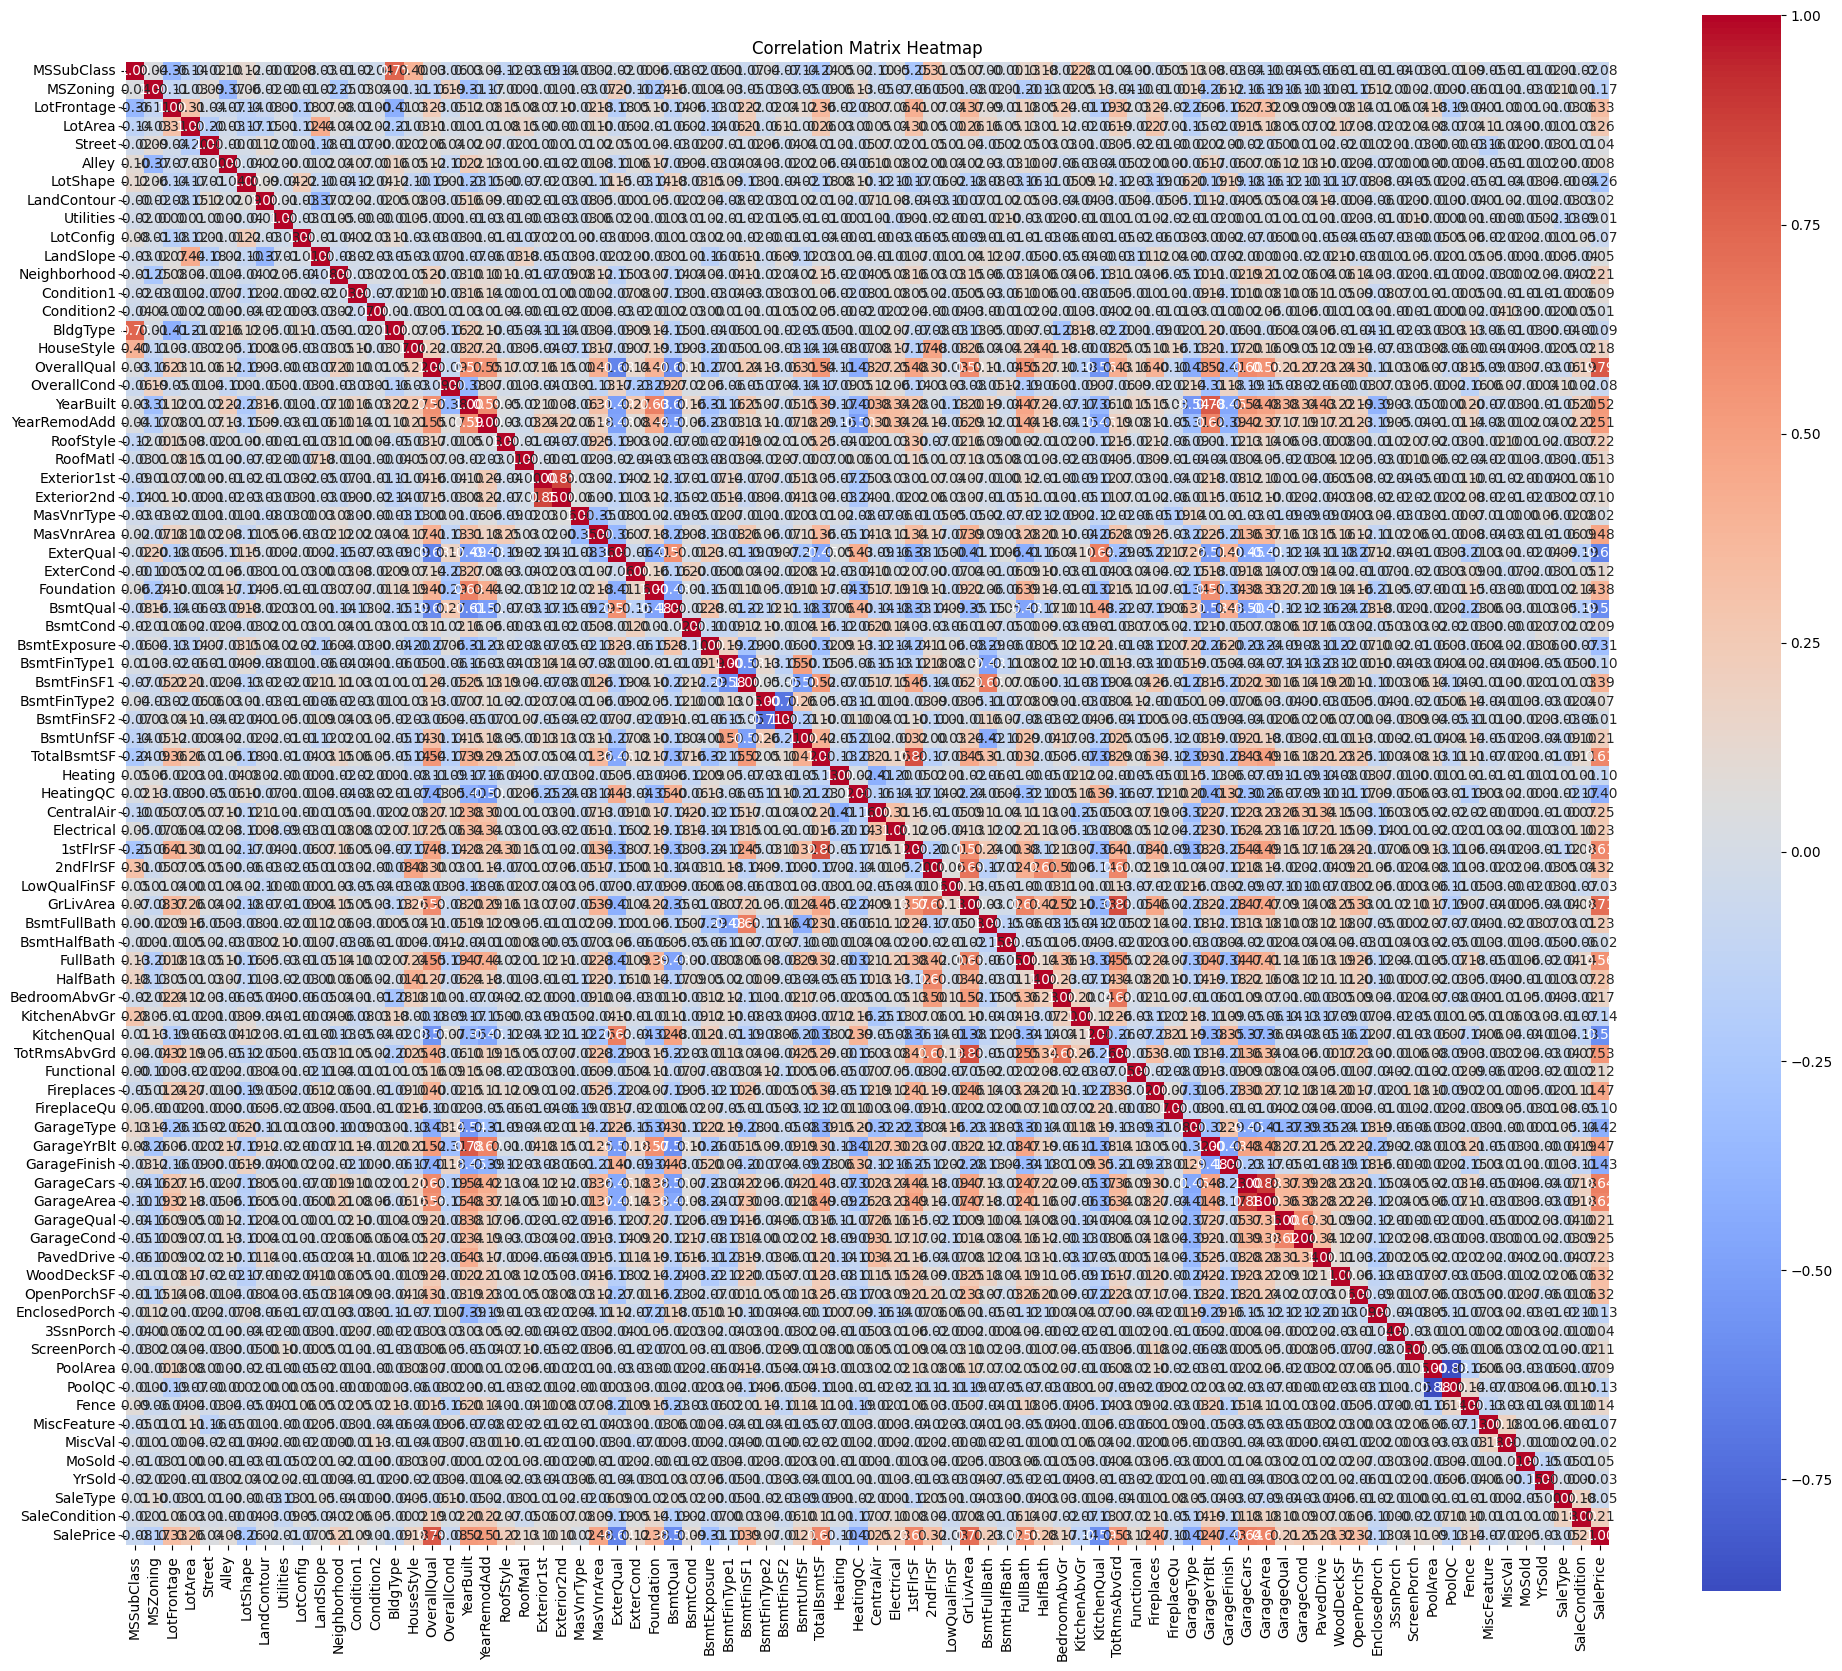

In [ ]:
correlation_matrix = df_concat.corr()

# In ra ma trận tương quan
print(correlation_matrix)

# Tạo biểu đồ heatmap từ ma trận tương quan
plt.figure(figsize=(20, 20))  # Tùy chỉnh kích thước biểu đồ
sns.heatmap(correlation_matrix, 
            annot=True,         # Hiển thị giá trị trong mỗi ô          # Định dạng số thập phân
            cmap='coolwarm',    # Bảng màu
            square=True,        # Ô vuông vắn
            cbar_kws={"shrink": .8})  # Tùy chỉnh thanh màu

# Tiêu đề (nếu muốn)
plt.title("Correlation Matrix Heatmap")

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [557]:
# Lấy độ tương quan tuyệt đối
correlation_with_output = correlation_matrix['SalePrice']

# Lọc các feature có độ tương quan tuyệt đối lớn hơn 0.3 và bỏ qua 'SalePrice'
high_correlation_features = correlation_with_output[correlation_with_output.abs() > 0.3].drop('SalePrice')

# In kết quả
print(high_correlation_features.to_string())

# Lấy danh sách các feature có độ tương quan tuyệt đối lớn hơn 0.3
high_correlation_features_list = high_correlation_features.index.tolist()

# In danh sách các feature
print(high_correlation_features_list)


LotFrontage     0.334901
OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
ExterQual      -0.636884
Foundation      0.382479
BsmtQual       -0.593734
BsmtExposure   -0.309043
BsmtFinSF1      0.386420
TotalBsmtSF     0.613581
HeatingQC      -0.400178
1stFlrSF        0.605852
2ndFlrSF        0.319334
GrLivArea       0.708624
FullBath        0.560664
KitchenQual    -0.589189
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageType     -0.415283
GarageYrBlt     0.470177
GarageFinish   -0.425684
GarageCars      0.640409
GarageArea      0.623431
WoodDeckSF      0.324413
OpenPorchSF     0.315856
['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF'

In [558]:
filtered_df = df[high_correlation_features_list]
print(filtered_df)

      LotFrontage  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0        0.207668     0.666667   0.949275      0.883333    0.122500   
1        0.255591     0.555556   0.753623      0.433333    0.000000   
2        0.217252     0.666667   0.934783      0.866667    0.101250   
3        0.191693     0.666667   0.311594      0.333333    0.000000   
4        0.268371     0.777778   0.927536      0.833333    0.218750   
...           ...          ...        ...           ...         ...   
1455     0.198083     0.555556   0.920290      0.833333    0.000000   
1456     0.271565     0.555556   0.768116      0.633333    0.074375   
1457     0.210863     0.666667   0.500000      0.933333    0.000000   
1458     0.217252     0.444444   0.565217      0.766667    0.000000   
1459     0.239617     0.444444   0.673913      0.250000    0.000000   

      ExterQual  Foundation  BsmtQual  BsmtExposure  BsmtFinSF1  ...  \
0      0.666667         0.4       0.4          0.75    0.125089  ...   
1  

In [559]:
filtered_x = np.array(filtered_df)
print(filtered_x.shape)

(1460, 26)


In [560]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(filtered_x, y, test_size=0.2, random_state=42)

In [561]:
print(X_train_2.shape)

(1168, 26)


In [562]:
model = LinearRegression()
model.fit(X_train_2, y_train_2)

# Dự đoán
y_pred_2 = model.predict(X_test_2)

# Đánh giá mô hình
print("Hệ số (coefficients):", model.coef_)
print("Độ lệch (intercept):", model.intercept_)
print("MSE:", mean_squared_error(y_test_2, y_pred_2))
print("R^2 score:", r2_score(y_test_2, y_pred_2))

Hệ số (coefficients): [  -9081.07287795  122903.66803465   18235.98714336   10717.73930862
   27677.11379845  -22425.07550701     988.21057456  -21596.74429409
  -13312.01357645   88398.21807349   19544.42171319   -3244.3016591
   89572.96730498   27009.05615288  112687.377501     -6655.96439646
  -30318.26288513   29134.18255595   25536.43255398   -1436.73491957
 -220192.01240966   -4884.04186891   38528.75139569   23502.49965074
   22361.52726632    1101.75122904]
Độ lệch (intercept): 278004.9038697125
MSE: 1258077072.0732267
R^2 score: 0.835981281878937
